In [6]:
import math
import matplotlib.pyplot as plt

Susceptible population formula

In [7]:
def Fs(c, t, s, i):
    return -c * s * i

Infected population formula

In [8]:
def Fi(c, l, t, s, i):
    return i * (c  * s - l)

Recovered population formula

In [9]:
def Fr(l, t, i):
    return l * i

Fourth-Order Runge-Kutta performance on SIR-model

In [10]:
def Runge_Kutta(a, b, n, c, l, s0, i0, r0):
    
    h = (b - a) / n
    t = a
    s = s0
    i = i0
    r = r0
   
    print('Runge-Kutta Solutions')
   
    for j in range(1, n + 1): 
       
        ks1 = h * Fs(c, t, s, i)
        ki1 = h * Fi(c, l, t, s, i)
        kr1 = h * Fr(l, t, i)
        
        ks2 = h * Fs(c, t + h / 2, s + ks1 / 2, i + ki1 / 2)
        ki2 = h * Fi(c, l, t + h / 2, s + ks1 / 2, i + ki1 / 2)
        kr2 = h * Fr(l, t + h / 2, i + ki1 / 2)
        
        ks3 = h * Fs(c, t + h / 2, s + ks2 / 2, i + ki2 / 2)
        ki3 = h * Fi(c, l, t + h / 2, s + ks2 / 2, i + ki2 / 2) 
        kr3 = h * Fr(l, t + h / 2, i + ki2 / 2)
        
        ks4 = h * Fs(c, t + h, s + ks3, i + ki3)
        ki4 = h * Fi(c, l, t + h, s + ks3, i + ki3)
        kr4 = h * Fr(l, t + h, i + ki3)
     
        s = s + (1.0 / 6.0)*(ks1 + 2 * ks2 + 2 * ks3 + ks4)
        i = i + (1.0 / 6.0)*(ki1 + 2 * ki2 + 2 * ki3 + ki4)
        r = r + (1.0 / 6.0)*(kr1 + 2 * kr2 + 2 * kr3 + kr4)
        t += h
        
        if t >= 10.0:
            t_new = '{0:.1f}'.format(t)
        else:
            t_new = '{0:.2f}'.format(t)
            
        s_new = str(s)[:8]
        i_new = str(i)[:8]
        r_new = str(r)[:8]
        
        if j >= 100.0:
            print(f'n = {j}, t = {t_new}, s(t) = {s_new}, i(t) = {i_new}, r(t) = {r_new}')
        elif j >= 10.0:
            print(f'n = {j},  t = {t_new}, s(t) = {s_new}, i(t) = {i_new}, r(t) = {r_new}')
        else:
            print(f'n = {j},   t = {t_new}, s(t) = {s_new}, i(t) = {i_new}, r(t) = {r_new}')
                
    return None


In [11]:
Runge_Kutta(0, 40, 100, 1 / 7138, 0.4, 7137, 1, 0)

Runge-Kutta Solutions
n = 1,   t = 0.40, s(t) = 7136.548, i(t) = 1.271155, r(t) = 0.180822
n = 2,   t = 0.80, s(t) = 7135.973, i(t) = 1.615790, r(t) = 0.410671
n = 3,   t = 1.20, s(t) = 7135.243, i(t) = 2.053787, r(t) = 0.702833
n = 4,   t = 1.60, s(t) = 7134.315, i(t) = 2.610392, r(t) = 1.074182
n = 5,   t = 2.00, s(t) = 7133.136, i(t) = 3.317651, r(t) = 1.546159
n = 6,   t = 2.40, s(t) = 7131.637, i(t) = 4.216219, r(t) = 2.145990
n = 7,   t = 2.80, s(t) = 7129.734, i(t) = 5.357651, r(t) = 2.908247
n = 8,   t = 3.20, s(t) = 7127.315, i(t) = 6.807276, r(t) = 3.876806
n = 9,   t = 3.60, s(t) = 7124.244, i(t) = 8.647803, r(t) = 5.107336
n = 10,  t = 4.00, s(t) = 7120.345, i(t) = 10.98383, r(t) = 6.670420
n = 11,  t = 4.40, s(t) = 7115.397, i(t) = 13.94744, r(t) = 8.655495
n = 12,  t = 4.80, s(t) = 7109.119, i(t) = 17.70515, r(t) = 11.17578
n = 13,  t = 5.20, s(t) = 7101.159, i(t) = 22.46633, r(t) = 14.37444
n = 14,  t = 5.60, s(t) = 7091.074, i(t) = 28.49352, r(t) = 18.43225
n = 15,  t =

Error measure on Runge-Kutta Method

In [12]:
def Runge_Kutta_Error(a, b, n, c, l, s0, i0, r0):
    
    h = (b - a) / n
    t = a
    s = s0
    i = i0
    r = r0
    
    s_exact = [0] * n
    i_exact = [0] * n
    r_exact = [0] * n
    
    s_exact[0] = s0
    i_exact[0] = i0
    r_exact[0] = r0
   
    print('Runge-Kutta Error')
    
    for j in range(1, n + 1): 
       
        ks1 = h * Fs(c, t, s, i)
        ki1 = h * Fi(c, l, t, s, i)
        kr1 = h * Fr(l, t, i)
        
        ks2 = h * Fs(c, t + h / 2, s + ks1 / 2, i + ki1 / 2)
        ki2 = h * Fi(c, l,t + h / 2, s + ks1 / 2, i + ki1 / 2)
        kr2 = h * Fr(l, t + h / 2, i + ki1 / 2)
        
        ks3 = h * Fs(c, t + h / 2, s + ks2 / 2, i + ki2 / 2)
        ki3 = h * Fi(c, l, t + h / 2, s + ks2 / 2, i + ki2 / 2) 
        kr3 = h * Fr(l, t + h / 2, i + ki2 / 2)
        
        ks4 = h * Fs(c, t + h, s + ks3, i + ki3)
        ki4 = h * Fi(c, l, t + h, s + ks3, i + ki3)
        kr4 = h * Fr(l, t+ h, i + ki3)
     
        s = s + (1.0 / 6.0)*(ks1 + 2 * ks2 + 2 * ks3 + ks4)
        i = i + (1.0 / 6.0)*(ki1 + 2 * ki2 + 2 * ki3 + ki4)
        r = r + (1.0 / 6.0)*(kr1 + 2 * kr2 + 2 * kr3 + kr4)
        t += h
        
        s_exact[j - 1] = s_exact[0] * math.exp(-c * i_exact[j - 1] * t)
        i_exact[j - 1] = i_exact[0] * math.exp((-c * s_exact[j - 1] * t) - (l * t))
        r_exact[j - 1] = l * i_exact[j - 1] * t + r_exact[0]
        
        s_error = abs(s - s_exact[j - 1])
        i_error = abs(i - i_exact[j - 1])
        r_error = abs(r - r_exact[j - 1])
         
        if t >= 10.0:
            t_new = '{0:.1f}'.format(t)
        else:
            t_new = '{0:.2f}'.format(t)
            
        s_error_new = str(s_error)[:8]
        i_error_new = str(i_error)[:8]
        r_error_new = str(r_error)[:8]
        
        if j >= 100.0:
            print(f'n = {j}, t = {t_new}, s error = {s_error_new}, i error = {i_error_new}, r error = {r_error_new}')
        elif j >= 10.0:
            print(f'n = {j},  t = {t_new}, s error = {s_error_new}, i error = {i_error_new}, r error = {r_error_new}')
        else:
            print(f'n = {j},   t = {t_new}, s error = {s_error_new}, i error = {i_error_new}, r error = {r_error_new}')
                
   
    return None


In [13]:
Runge_Kutta_Error(0, 40, 100, 1 / 7138, 0.4, 7137, 1, 0)

Runge-Kutta Error
n = 1,   t = 0.40, s error = 0.052044, i error = 0.699901, r error = 0.089421
n = 2,   t = 0.80, s error = 0.626529, i error = 1.429372, r error = 0.259617
n = 3,   t = 1.20, s error = 1.356687, i error = 1.947295, r error = 0.560316
n = 4,   t = 1.60, s error = 2.284642, i error = 2.549558, r error = 0.943848
n = 5,   t = 2.00, s error = 3.463877, i error = 3.282899, r error = 1.426957
n = 6,   t = 2.40, s error = 4.962277, i error = 4.196367, r error = 2.035532
n = 7,   t = 2.80, s error = 6.865965, i error = 5.346310, r error = 2.804145
n = 8,   t = 3.20, s error = 9.284150, i error = 6.800797, r error = 3.777114
n = 9,   t = 3.60, s error = 12.35520, i error = 8.644102, r error = 5.010606
n = 10,  t = 4.00, s error = 16.25431, i error = 10.98171, r error = 6.575637
n = 11,  t = 4.40, s error = 21.20301, i error = 13.94624, r error = 8.561968
n = 12,  t = 4.80, s error = 27.48100, i error = 17.70446, r error = 11.08305
n = 13,  t = 5.20, s error = 35.44084, i error

In [14]:
def Runge_Kutta_Graph(a, b, n, c, l, s0, i0, r0):
    
    h = (b - a) / n
    t = [0] * n
    t[0] = a
    t[1] = a + h
    
    S = [0] * n
    I = [0] * n
    R = [0] * n
    
    S[0] = s0
    I[0] = i0
    R[0] = r0
   
    for j in range(0, n - 1): 
       
        ks1 = h * Fs(c, t[j], S[j], I[j])
        ki1 = h * Fi(c, l, t[j], S[j], I[j])
        kr1 = h * Fr(l, t[j], I[j])
        
        ks2 = h * Fs(c, t[j] + h / 2, S[j] + ks1 / 2, I[j] + ki1 / 2)
        ki2 = h * Fi(c, l, t[j] + h / 2, S[j] + ks1 / 2, I[j] + ki1 / 2)
        kr2 = h * Fr(l, t[j] + h / 2, I[j] + ki1 / 2)
        
        ks3 = h * Fs(c, t[j] + h / 2, S[j] + ks2 / 2, I[j] + ki2 / 2)
        ki3 = h * Fi(c, l, t[j] + h / 2, S[j] + ks2 / 2, I[j] + ki2 / 2) 
        kr3 = h * Fr(l, t[j] + h / 2, I[j] + ki2 / 2)
        
        ks4 = h * Fs(c, t[j] + h, S[j] + ks3, I[j] + ki3)
        ki4 = h * Fi(c, l, t[j] + h, S[j] + ks3, I[j] + ki3)
        kr4 = h * Fr(l, t[j] + h, I[j] + ki3)
     
        S[j + 1] = S[j] + (1.0 / 6.0)*(ks1 + 2 * ks2 + 2 * ks3 + ks4)
        I[j + 1] = I[j] + (1.0 / 6.0)*(ki1 + 2 * ki2 + 2 * ki3 + ki4)
        R[j + 1] = R[j] + (1.0 / 6.0)*(kr1 + 2 * kr2 + 2 * kr3 + kr4)
        t[j + 1] = t[j] + h
        
  
    plt.figure()

    plt.plot(t, S, label = '$S(t)$')
    plt.plot(t, I, label = '$I(t)$')
    plt.plot(t, R, label = '$R(t)$')

    plt.title('Susceptible vs. Infected vs. Recovered')
    plt.xlabel('time (days)')
    plt.ylabel('# of people')
    plt.legend(loc = 'upper left')

    plt.grid() 
    plt.show()

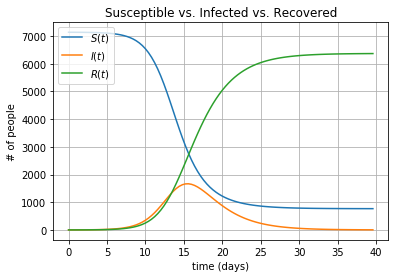

In [15]:
Runge_Kutta_Graph(0, 40, 100, 1 / 7138, 0.4, 7137, 1, 0)